In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels

In [2]:
from emg.models.mlp import main as mlp_test 
from emg.models.cnn import main as cnn_test
from emg.models.lstm import main as lstm_test
from emg.models.c3d import main as c3d_test

In [3]:
def plot_confusion_matrix(matrix,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    # Compute confusion matrix
    cm = matrix
    cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    
    fig, ax = plt.subplots(figsize=(10, 10))
    
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]))
    
    ax.set_xlabel(xlabel='True label', fontsize=20)
    ax.set_ylabel(ylabel='Predicted label', fontsize=20)

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    fontsize=14,
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

In [4]:
lstm_args = {
    'model': 'lstm',
    'name': 'Demon-12',
    'sub_folder': 'LSTM',
    'dataset': 'capg',
    'gesture_num': 12,
    'epoch': 30,
    'train_batch_size': 256,
    'valid_batch_size': 1024,
    'lr': 0.0001,
    'lr_step': 5,
    'stop_patience': 5
}

# Stacked LSTM

In [5]:
lstm_matrix = lstm_test(lstm_args, TEST_MODE=True)

processed capg data exist, load test data from the file
load parameter from a pretrained model
[[662  64  30  20   5  55   5   1  92  11  44  11]
 [ 35 704   5   5   2   3  31   6  68  59  45  37]
 [ 32  14 863   1   8   8   1  12  21   2  25  13]
 [ 34   5   2 835  18  20  38   4  21   4  18   1]
 [  0   2  12  29 911   4   7  14   7   3  10   1]
 [  4   0  20  14   4 854  30   4  11  18  37   4]
 [  7   3  10   6   0 136 614   3  92  19  99  11]
 [  1   4  11   1   2   6   0 912  34   7  22   0]
 [ 25  13  11   9  13   8  29   1 706  44  88  53]
 [ 11   9   1   7   6   3   9   5  54 698 142  55]
 [ 10   5   7  11   2   3  23   8  36  72 819   4]
 [ 13  14  10   1   0   3  13   4   6 104  65 767]]
test accuracy: 0.7784


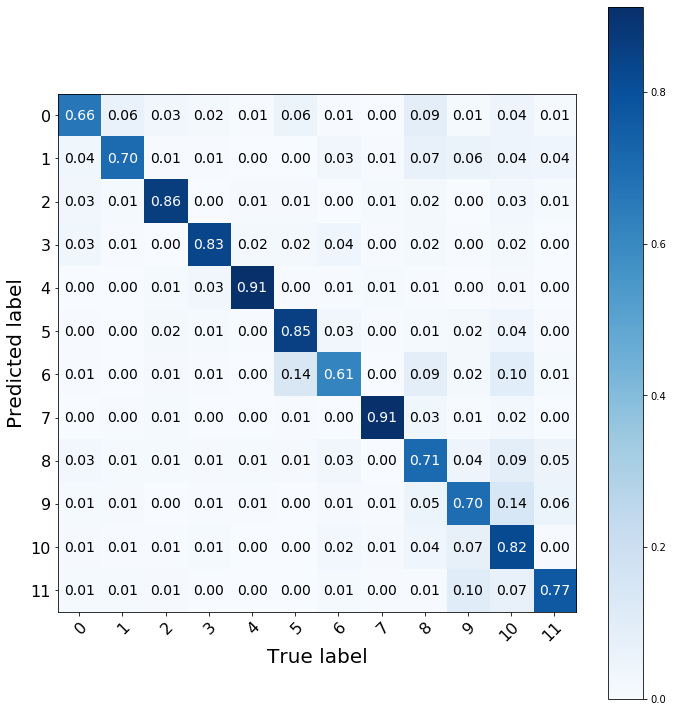

In [6]:
plot_confusion_matrix(matrix=lstm_matrix)

In [7]:
cnn_args = {
    'model': 'cnn',
    'name': 'Demon-12',
    'sub_folder': 'ConvNet',
    'dataset': 'capg',
    'gesture_num': 12,
    'epoch': 30,
    'train_batch_size': 128,
    'valid_batch_size': 1024,
    'lr': 0.001,
    'lr_step': 50
}

# ConvNet

In [8]:
cnn_matrix = cnn_test(cnn_args, TEST_MODE=True)

processed capg data exist, load test data from the file
load parameter from a pretrained model
[[734  54  28  41   9  33   7   7  39   3  22  23]
 [127 704   5  13   4  26  14   9  48  19  12  19]
 [ 34   7 830   2  21  25   6  22  22   3  21   7]
 [ 53  11   5 732  33  60  33  18  22  17  12   4]
 [  3   0  22  24 884  10  15  24   6   3   6   3]
 [ 14   7  16  13   6 836  35   9  20   4  28  12]
 [ 14  13  12  15  22 113 742   8  17   7  25  12]
 [  1   6  12   8  18   4   3 889  45   5   6   3]
 [ 61  30  19   7  10  29  21   6 714  20  38  45]
 [ 17  12   2  17   1  23  23  14  74 569  83 165]
 [ 15  16  10  20   8  13  41  10  38  22 797  10]
 [  5  12   3   5   4  11  32  15  18  92  59 744]]
test accuracy: 0.7648


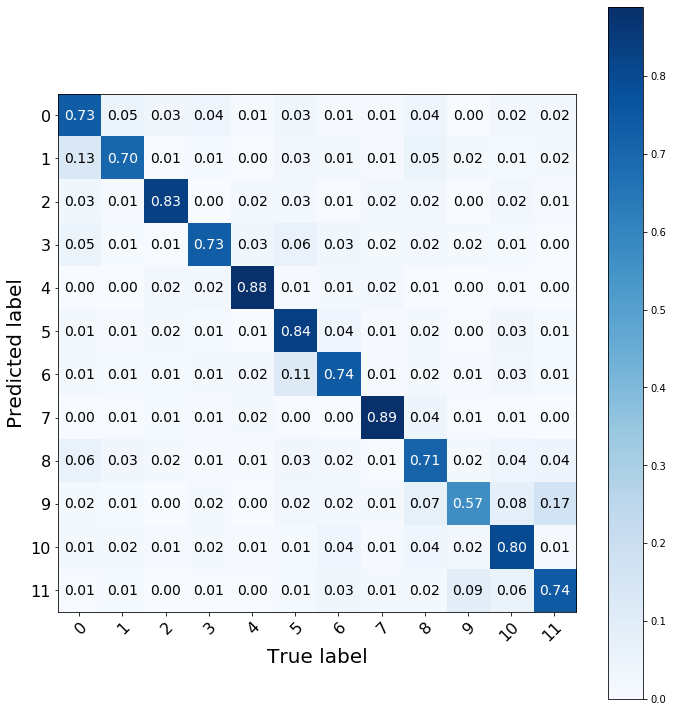

In [9]:
plot_confusion_matrix(matrix=cnn_matrix)

In [10]:
c3d_args = {
    'model': 'c3d',
    'name': 'Demon-12',
    'sub_folder': 'C3D',
    'dataset': 'capg',
    'gesture_num': 12,
    'epoch': 3,
    'train_batch_size': 256,
    'valid_batch_size': 1024,
    'lr': 0.001,
    'lr_step': 5
}

# C3D

In [11]:
c3d_matrix = c3d_test(c3d_args, TEST_MODE=True)

processed capg data exist, load test data from the file
load parameter from a pretrained model
[[853  34  11  20   0  12   7   0  45   1   2  15]
 [ 60 870   4   3   0  16   7   4  23   5   3   5]
 [ 13   7 923   0   4  38   1   4   3   1   0   6]
 [ 26   3   0 921  13   8  15   0   5   5   4   0]
 [  1   0   6   6 978   0   2   5   0   0   0   2]
 [  4   2  10  27   0 910  26   1   6   5   7   2]
 [  4  12   7   7   6  72 850   3  21   7   8   3]
 [  2   5  14   1  10   0   0 959   5   1   1   2]
 [ 51  13  13   3   8  11   9   3 841  12   6  30]
 [  5   8   2   6   3   4  12   2  28 813  27  90]
 [  5   2   6  11   6   3  21   2  62  33 843   6]
 [  5  11   5   3   0   2   6   7   3  69  36 853]]
test accuracy: 0.8837


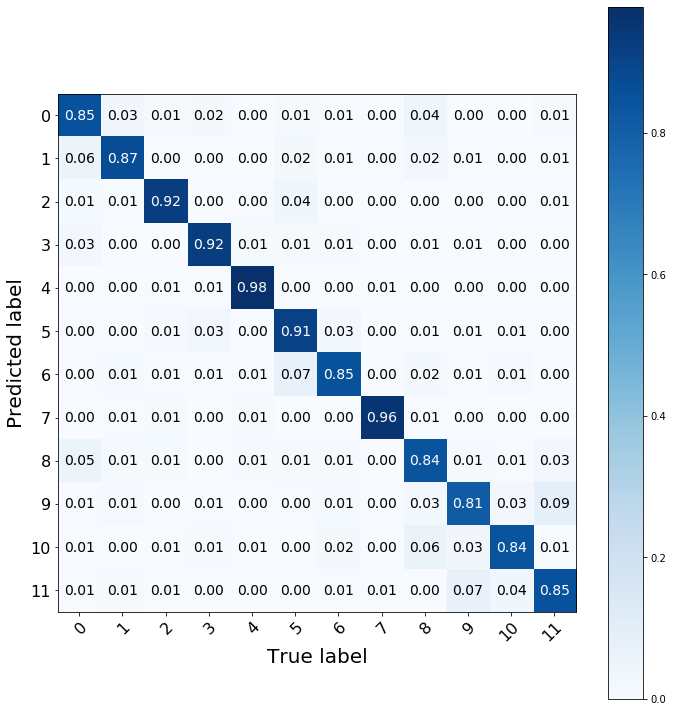

In [12]:
plot_confusion_matrix(matrix=c3d_matrix)

In [13]:
mlp_args = {
    'model': 'mlp',
    'name': 'Demon-12',
    'sub_folder': 'MLP',
    'dataset': 'capg',
    'gesture_num': 12,
    'epoch': 200,
    'train_batch_size': 512,
    'valid_batch_size': 2048,
    'lr': 0.001,
    'lr_step': 40
}

# MLP

In [14]:
mlp_matrix = mlp_test(mlp_args, TEST_MODE=True)

processed capg data exist, load test data from the file
load parameter from a pretrained model
[[535 130  46  75  16  33  12  10  62  21  28  32]
 [ 76 551  28  24  20  23  56  27  59  51  30  55]
 [ 71  34 639   6  34  31  29  44  47  19  27  19]
 [ 66  34  10 561  69  57  77  24  35  27  27  13]
 [ 11  10  50  61 739  12  22  26  23   7  22  17]
 [ 41  22  44  46  15 574  94  28  38  13  46  39]
 [ 39  29  48  35  21 171 441  18  99  27  50  22]
 [  9  19  37   6  32   5   6 791  60  16  15   4]
 [ 66  52  38  24  23  50  51  20 452  67  71  86]
 [ 30  64   9  40  21  26  50  36  72 431  89 132]
 [ 36  37  31  73  23  25  50  33  77  55 537  23]
 [ 38  54   9  22   2  22  39  26  32 106  66 584]]
test accuracy: 0.5697


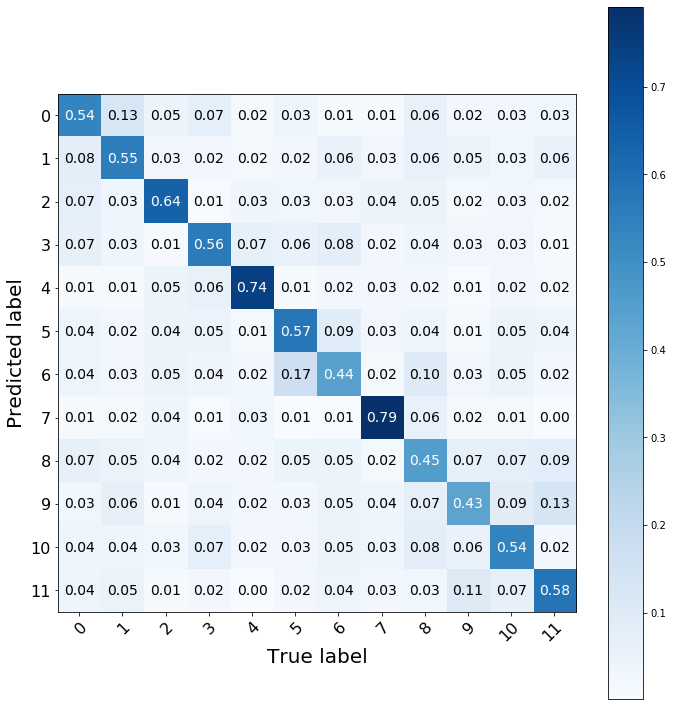

In [15]:
plot_confusion_matrix(matrix=mlp_matrix)